# Age and gender detection

### Reading dataset from the folder

In [1]:
fldr="C:/Users/shch/Desktop/Face_data_based_deeplearning-master/data/crop_part1"

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd2

In [3]:
files=os.listdir(fldr)

In [182]:
files[39]

'10_0_0_20170110224549512.jpg.chip.jpg'

### Adding the age and gender labels of each image into separate lists

In [5]:
import cv2
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)
    total=fldr+'/'+fle
    image=cv2.imread(total)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)


In [6]:
len(images)

9780

Age: 18
Gender: 1


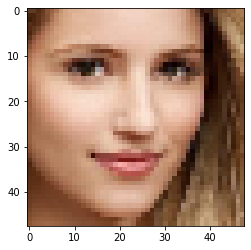

In [181]:
plt.imshow(images[1068])
print('Age:',ages[1068])
print('Gender:',genders[1068])

### Converting the list of images into numpy arrays

In [8]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [9]:
images_f.shape

(9780, 48, 48, 3)

#### An NPY file is a NumPy array file created by the Python software package with the NumPy library installed. It contains an array saved in the NumPy (NPY) file format.

In [10]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'gender.npy',genders_f)
np.save(fldr+'age.npy',ages_f)

### Counting the number of images of males and females

In [11]:
#Male = 0 Female= 1

values,counts = np.unique(genders_f, return_counts=True)
print(counts)

[4372 5407    1]


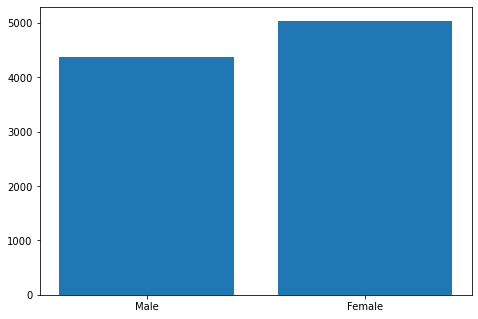

In [175]:
# Plotting a barplot for displaying the number of male and female images

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[4372,5047]
ax.bar(gender,values)
plt.show()

### Counting the number of images in each unique value of age

In [13]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1112  475  284  260  180  114  126  236  159  140   63  106   75  137
  143  212  103  181   58  103  136  139   92  191  156  279  126  145
  150  109   97  141   46   87  121  112   94   91  136   85   56   84
   52   27   77   61   70   64   99  105   62  133  133  106   52  132
   60   96   59  137   50   76   47   29  113   54   47   58   45   53
   22   70   31   16   87   35   19   30   16   71   10   29    7   11
  130   23    4   17   16   56    1   13    3    3   16    2    2    1
    2]


In [14]:
val=values.tolist()
cnt=counts.tolist()

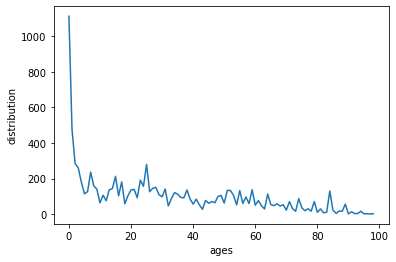

In [15]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [16]:
images_df = pd.DataFrame(cnt, index=val, columns=['utkface_images'])
images_df

,utkface_images
1,1112
2,475
3,284
4,260
5,180
...,...
96,16
99,2
100,2
101,1


In [17]:
# Exporting above created dataframe as a CSV file.

images_df.to_csv("C:/Users/shch/Desktop/Face_data_based_deeplearning-master/images_summary.csv", index=True, index_label='age')

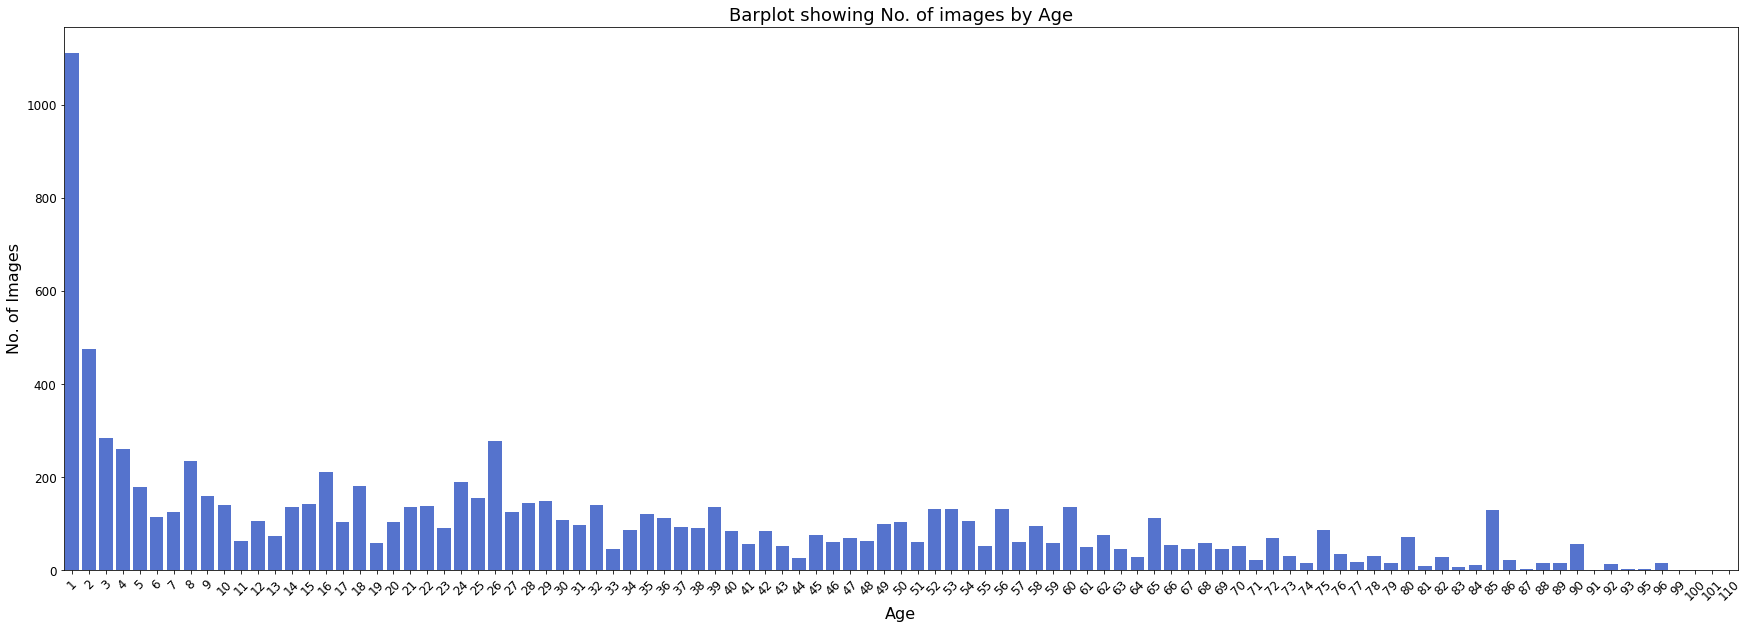

In [18]:
# Plotting the no. of images by ages in a barplot.

import seaborn as sns


plt.figure(figsize=(30, 10))

ax = sns.barplot(x=images_df.index, y=images_df['utkface_images'], color='royalblue')

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)

plt.xlabel("Age", fontsize=16)
plt.ylabel("No. of Images", fontsize=16)

plt.title("Barplot showing No. of images by Age", fontsize=18)

# Exporting plot image in PNG format.
plt.savefig('C:/Users/shch/Desktop/Face_data_based_deeplearning-master/images_fd/barplot_utkface_images.png', bbox_inches='tight');

In [19]:
labels=[]

i=0
while i<len(ages):
    label=[]
    label.append([ages[i]])
    label.append([genders[i]])
    labels.append(label)
    i+=1

### Preparing the test and train dataset

In [20]:
# Normalizing image_f

images_f_2=images_f/255

In [24]:
#labels

labels_f=np.array(labels)

In [25]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f, test_size=0.2)

In [26]:
Y_train[0:5]

array([[[27],
        [ 1]],

       [[49],
        [ 1]],

       [[ 1],
        [ 0]],

       [[ 4],
        [ 1]],

       [[26],
        [ 1]]])

In [27]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [28]:
#gender labels
Y_train_2[0][0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]])

In [29]:
#age labels
Y_train_2[1][0:5]

array([[ 2],
       [52],
       [ 1],
       [25],
       [ 1]])

### Preparing the model

In [194]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)

    return x

def model(input_shape):
    inputs = Input((input_shape))

    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
    flatten = Flatten() (maxp_4)
    dense_1 = Dense(128,activation='relu')(flatten)
    dense_2 = Dense(128,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1,activation="sigmoid",name='gender')(drop_1)
    output_2 = Dense(1,activation="relu",name='age')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",metrics=["accuracy"])

    return model


In [195]:
Model=model((48,48,3))
Model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 48, 48, 32)   896         input_7[0][0]                    
__________________________________________________________________________________________________
activation_24 (Activation)      (None, 48, 48, 32)   0           conv2d_24[0][0]                  
__________________________________________________________________________________________________
dropout_36 (Dropout)            (None, 48, 48, 32)   0           activation_24[0][0]              
____________________________________________________________________________________________

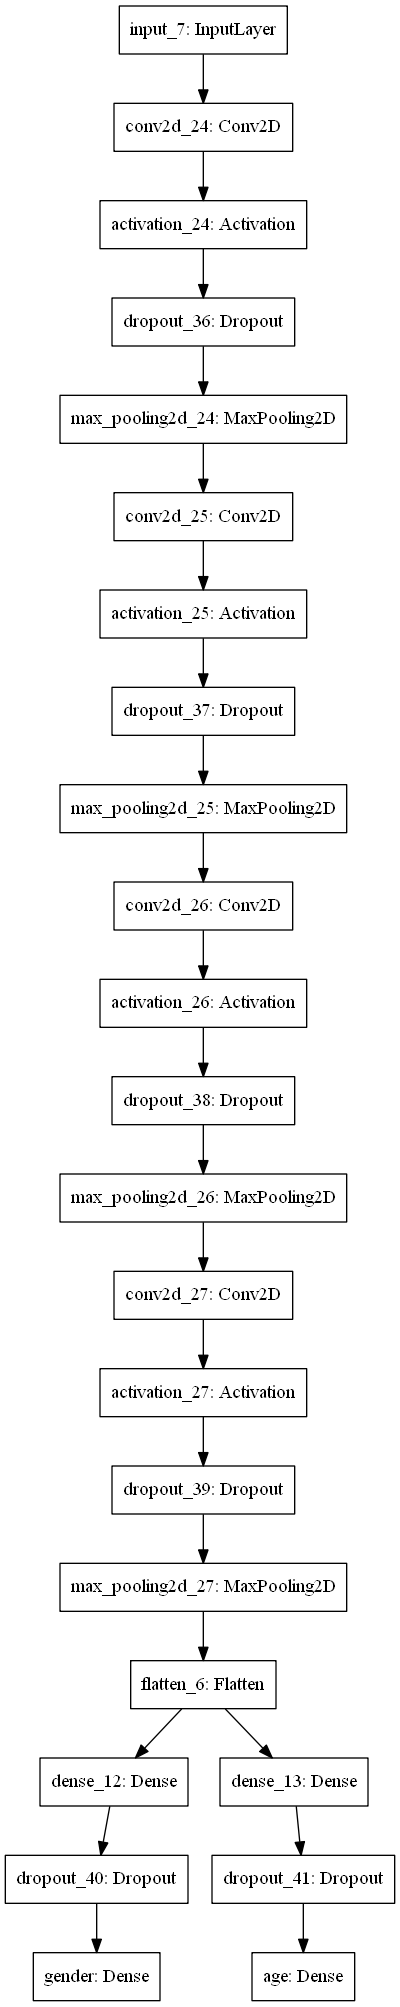

In [196]:
from tensorflow.keras.utils import plot_model
plot_model(Model, to_file='gad0_model.png')

In [197]:
from tensorflow.keras.callbacks import ModelCheckpoint

fle_s='Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True)
callback_list=[checkpointer,Early_stop]

In [198]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=50,callbacks=callback_list)

Train on 7335 samples, validate on 2445 samples
Epoch 1/50
7296/7335 [============================>.] - ETA: 0s - loss: 22.6710 - gender_loss: 0.6918 - age_loss: 21.7765 - gender_accuracy: 0.5533 - age_accuracy: 0.1131
Epoch 00001: val_loss improved from inf to 19.55341, saving model to Age_sex_detection.h5
7335/7335 [==============================] - 68s 9ms/sample - loss: 22.6720 - gender_loss: 0.6915 - age_loss: 21.7787 - gender_accuracy: 0.5536 - age_accuracy: 0.1130 - val_loss: 19.5534 - val_gender_loss: 0.6629 - val_age_loss: 18.6325 - val_gender_accuracy: 0.5689 - val_age_accuracy: 0.1141
Epoch 2/50
7296/7335 [============================>.] - ETA: 0s - loss: 18.6920 - gender_loss: 0.6541 - age_loss: 17.8581 - gender_accuracy: 0.6101 - age_accuracy: 0.1105
Epoch 00002: val_loss improved from 19.55341 to 15.65832, saving model to Age_sex_detection.h5
7335/7335 [==============================] - 39s 5ms/sample - loss: 18.6928 - gender_loss: 0.6531 - age_loss: 17.8601 - gender_accu

7296/7335 [============================>.] - ETA: 0s - loss: 7.7262 - gender_loss: 0.4394 - age_loss: 6.8868 - gender_accuracy: 0.7777 - age_accuracy: 0.1120
Epoch 00016: val_loss did not improve from 8.42837
7335/7335 [==============================] - 48s 7ms/sample - loss: 7.7243 - gender_loss: 0.4392 - age_loss: 6.8840 - gender_accuracy: 0.7776 - age_accuracy: 0.1117 - val_loss: 8.9553 - val_gender_loss: 0.4226 - val_age_loss: 8.1600 - val_gender_accuracy: 0.7902 - val_age_accuracy: 0.1141
Epoch 17/50
7296/7335 [============================>.] - ETA: 0s - loss: 7.4907 - gender_loss: 0.4296 - age_loss: 6.6504 - gender_accuracy: 0.7859 - age_accuracy: 0.1129
Epoch 00017: val_loss did not improve from 8.42837
7335/7335 [==============================] - 48s 6ms/sample - loss: 7.4905 - gender_loss: 0.4303 - age_loss: 6.6492 - gender_accuracy: 0.7853 - age_accuracy: 0.1130 - val_loss: 10.0159 - val_gender_loss: 0.4353 - val_age_loss: 9.2017 - val_gender_accuracy: 0.7926 - val_age_accura

7296/7335 [============================>.] - ETA: 0s - loss: 5.9855 - gender_loss: 0.3549 - age_loss: 5.0762 - gender_accuracy: 0.8306 - age_accuracy: 0.1132
Epoch 00032: val_loss did not improve from 8.42837
7335/7335 [==============================] - 47s 6ms/sample - loss: 5.9862 - gender_loss: 0.3555 - age_loss: 5.0767 - gender_accuracy: 0.8303 - age_accuracy: 0.1136 - val_loss: 9.5816 - val_gender_loss: 0.3868 - val_age_loss: 8.6579 - val_gender_accuracy: 0.8082 - val_age_accuracy: 0.1141
Epoch 33/50
7296/7335 [============================>.] - ETA: 0s - loss: 5.8731 - gender_loss: 0.3476 - age_loss: 4.9636 - gender_accuracy: 0.8320 - age_accuracy: 0.1136
Epoch 00033: val_loss did not improve from 8.42837
7335/7335 [==============================] - 48s 7ms/sample - loss: 5.8725 - gender_loss: 0.3477 - age_loss: 4.9625 - gender_accuracy: 0.8319 - age_accuracy: 0.1136 - val_loss: 9.0619 - val_gender_loss: 0.3746 - val_age_loss: 8.1110 - val_gender_accuracy: 0.8176 - val_age_accurac

Epoch 48/50
7296/7335 [============================>.] - ETA: 0s - loss: 5.2760 - gender_loss: 0.3061 - age_loss: 4.3115 - gender_accuracy: 0.8558 - age_accuracy: 0.1133
Epoch 00048: val_loss did not improve from 8.39549
7335/7335 [==============================] - 48s 7ms/sample - loss: 5.2715 - gender_loss: 0.3060 - age_loss: 4.3041 - gender_accuracy: 0.8562 - age_accuracy: 0.1136 - val_loss: 8.6781 - val_gender_loss: 0.3734 - val_age_loss: 7.6325 - val_gender_accuracy: 0.8221 - val_age_accuracy: 0.1141
Epoch 49/50
7296/7335 [============================>.] - ETA: 0s - loss: 5.2189 - gender_loss: 0.2924 - age_loss: 4.2635 - gender_accuracy: 0.8610 - age_accuracy: 0.1138
Epoch 00049: val_loss did not improve from 8.39549
7335/7335 [==============================] - 48s 7ms/sample - loss: 5.2186 - gender_loss: 0.2925 - age_loss: 4.2629 - gender_accuracy: 0.8608 - age_accuracy: 0.1136 - val_loss: 8.7869 - val_gender_loss: 0.3657 - val_age_loss: 7.7552 - val_gender_accuracy: 0.8266 - val

### Evaluating model

In [199]:
Model.evaluate(X_test,Y_test_2)

2445/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[8.242430155701433, 0.35050583, 7.2060633, 0.8384458, 0.11411043]

In [200]:
pred=Model.predict(X_test)

In [201]:
#age
pred[1]

array([[46.433968 ],
       [49.9776   ],
       [ 1.4046191],
       ...,
       [ 1.0044595],
       [28.411228 ],
       [20.17469  ]], dtype=float32)

In [202]:
#sex
pred[0]

array([[0.2776078 ],
       [0.6227936 ],
       [0.74241704],
       ...,
       [0.4503269 ],
       [0.10726976],
       [0.99983156]], dtype=float32)

### Model performance curves

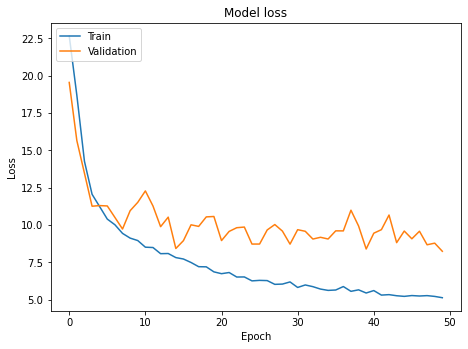

In [205]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

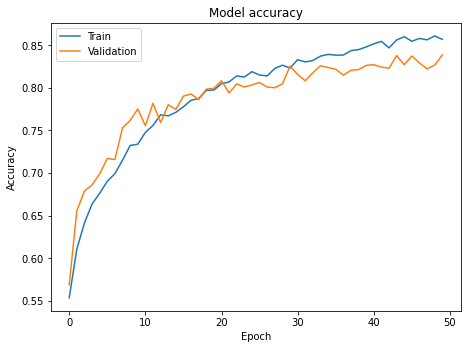

In [206]:
plt.plot(History.history['gender_accuracy'])
plt.plot(History.history['val_gender_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

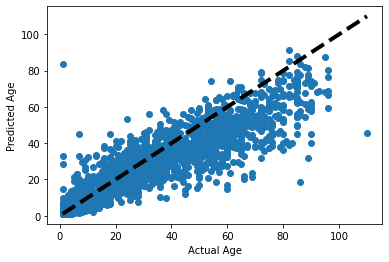

In [116]:
#For age

fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [117]:
#For Gender

i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

In [118]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

report=classification_report(Y_test_2[0], Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1072
           1       0.87      0.85      0.86      1373

    accuracy                           0.84      2445
   macro avg       0.84      0.84      0.84      2445
weighted avg       0.84      0.84      0.84      2445



In [120]:
results = confusion_matrix(Y_test_2[0], Pred_l)

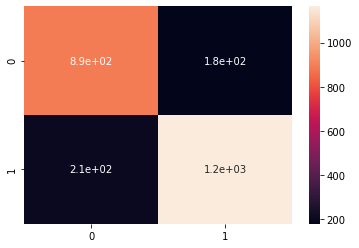

In [186]:
import seaborn as sns

sns.heatmap(results,annot=True)

### Testing on images from test set

In [122]:
def test_image(ind,images_f,images_f_2,ages,genders,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]  
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age_p=int(np.round(pred_1[1][0]))
    sex_p=int(np.round(pred_1[0][0]))
    age_a=int(np.round(ages[ind]))
    sex_a=int(np.round(genders[ind]))
    print("Predicted Age: "+ str(age_p))
    print("Predicted Sex: "+ sex_f[sex_p])
    print("Actual Age: "+ str(age_a))
    print("Actual Sex: "+ sex_f[sex_a])


Predicted Age: 39
Predicted Sex: Male
Actual Age: 43
Actual Sex: Male


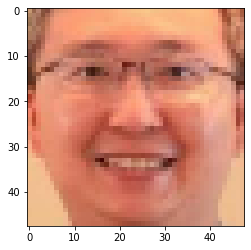

In [158]:
test_image(5895,images_f,images_f_2,ages,genders,Model)

Predicted Age: 7
Predicted Sex: Male
Actual Age: 10
Actual Sex: Male


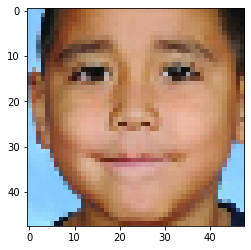

In [156]:
test_image(77,images_f,images_f_2,ages,genders,Model)

Predicted Age: 37
Predicted Sex: Female
Actual Age: 31
Actual Sex: Female


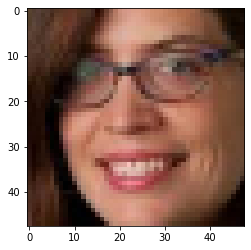

In [167]:
test_image(4523,images_f,images_f_2,ages,genders,Model)

### Testing on external images

In [132]:
def ext_sample(sample,Model):
    image=cv2.imread(sample)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image,(48,48))
    image_f=np.array(image)
    plt.imshow(image_f)
    image_f_2=image_f/255
    pred_1=Model.predict(np.array([image_f_2]))
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age: "+ str(age))
    print("Predicted Sex: "+ sex_f[sex])

Predicted Age: 22
Predicted Sex: Female


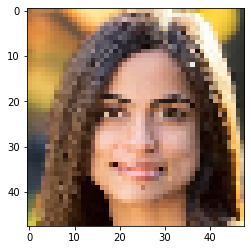

In [141]:
sample="C:/Users/shch/Desktop/Face_data_based_deeplearning-master/sample/girl7.jpg"
ext_sample(sample,Model)

Predicted Age: 29
Predicted Sex: Female


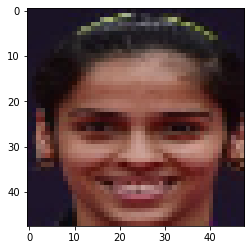

In [193]:
sample="C:/Users/shch/Desktop/Face_data_based_deeplearning-master/sample/saina_31.jpg"
ext_sample(sample,Model)

Predicted Age: 63
Predicted Sex: Male


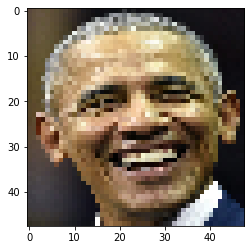

In [188]:
sample="C:/Users/shch/Desktop/Face_data_based_deeplearning-master/sample/obama_59.jpg"
ext_sample(sample,Model)